Task1


Combine the two resulting arrays (shakey_sobel_x and shakey_sobel_y) using Pythagoras theorem. To do this you will have to make your own function, such that:

m = magnitude(x,y)

Now display the resulting image using

show_rgb_image(m)

You can also display this edge image after thresholding it,

show_binary_image(m>40)

Create several of these with different thresholds.

QUESTION 1: What do you notice regarding the effect of changing the threshold? State both your observations and the reasons for the observations.

In [2]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from PIL import Image
import imageio

In [3]:
def load_and_gray_scale_image(image_path):
    image = imageio.imread(image_path)
    # Convert to grayscale if it is a colored image
    if len(image.shape) == 3:
        return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.float32)
    else:
        return image.astype(np.float32)

In [4]:
# Define the Sobel operators
sobel_x = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]])

sobel_y = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]])

In [5]:
# Load the image
shakey_path = '/Users/suzanaisaac/Desktop/shakey.jpg'
shakey = load_and_gray_scale_image(shakey_path)

# Apply the Sobel filters
shakey_sobel_x = scipy.signal.convolve2d(shakey, sobel_x, mode='same', boundary='fill', fillvalue=0)
shakey_sobel_y = scipy.signal.convolve2d(shakey, sobel_y, mode='same', boundary='fill', fillvalue=0)


In [6]:
# Calculate the gradient magnitude
m = np.sqrt(shakey_sobel_x**2 + shakey_sobel_y**2)

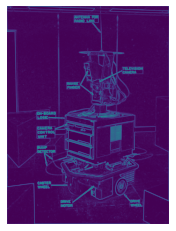

Threshold: 20


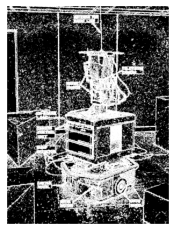

Threshold: 40


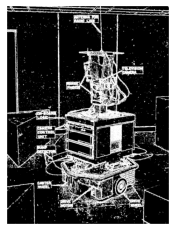

Threshold: 60


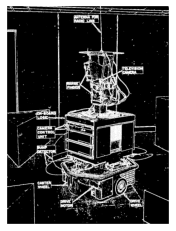

Threshold: 80


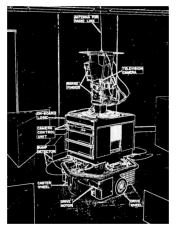

Threshold: 100


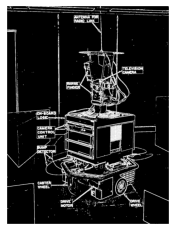

In [7]:
# Define a function to display an image
def show_image(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

# Display the gradient magnitude as an RGB image
show_image(m, cmap='viridis') # Use 'viridis' to represent the magnitude in color

# Apply different thresholds to the magnitude and display the results as binary images
thresholds = [20, 40, 60, 80, 100]
for threshold in thresholds:
    binary_image = m > threshold
    print(f"Threshold: {threshold}")
    show_image(binary_image)

Observations:
At lower thresholds (like 20), the binary image shows a lot of details, including both strong and weak edges. This happens because a low threshold considers both prominent edges and subtle variations in the gradient as edges.

As the threshold increases (40, 60), the weaker edges start to disappear from the binary images. Only the stronger edges, where the gradient magnitude is higher, remain. This is because higher thresholds ignore smaller changes in intensity.

At even higher thresholds (80, 100), very few edges are visible. This is due to the fact that only the most significant edges, which correspond to the most significant changes in intensity, have gradient magnitudes above these thresholds.

Repeat your previous exercise, with the Roberts operator.
QUESTION 2: What do you notice regarding the difference between Sobel and Roberts? State both your observations and the reasons for the observations.

In [8]:
roberts_x = np.array(
    [[1, 0],
     [0, -1]])

roberts_y = np.array(
    [[0, 1],
     [-1, 0]])

In [9]:
# Apply the Roberts filters
shakey_roberts_x = scipy.signal.convolve2d(shakey, roberts_x, mode='same', boundary='fill', fillvalue=0)
shakey_roberts_y = scipy.signal.convolve2d(shakey, roberts_y, mode='same', boundary='fill', fillvalue=0)

# Calculate the gradient magnitude for Roberts operator
m_roberts = np.sqrt(shakey_roberts_x**2 + shakey_roberts_y**2)

Roberts Gradient Magnitude Image:


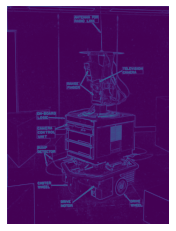

Roberts Operator - Threshold: 10


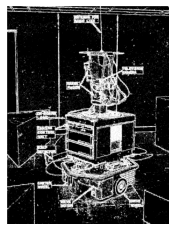

Roberts Operator - Threshold: 20


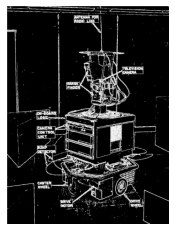

Roberts Operator - Threshold: 30


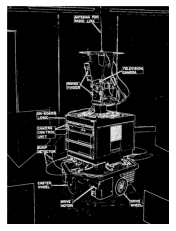

Roberts Operator - Threshold: 40


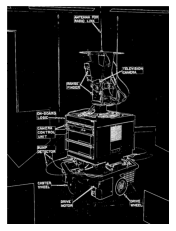

Roberts Operator - Threshold: 50


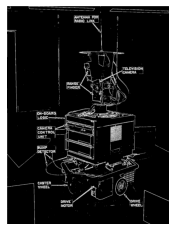

In [10]:
# Display the gradient magnitude as an RGB image for Roberts operator
print("Roberts Gradient Magnitude Image:")
show_image(m_roberts, cmap='viridis')

# Apply different thresholds to the Roberts magnitude and display the results as binary images
thresholds_roberts = [10, 20, 30, 40, 50]
for threshold in thresholds_roberts:
    binary_image_roberts = m_roberts > threshold
    print(f"Roberts Operator - Threshold: {threshold}")
    show_image(binary_image_roberts)

Observations:
Roberts Gradient Magnitude Image: The Roberts operator produces a gradient magnitude image where edges appear thinner and less smooth compared to the Sobel operator. This is due to the smaller 2x2 kernel of the Roberts operator, which is more sensitive to noise and has a tendency to produce a less smooth edge representation.

Binary Images at Different Thresholds: As with the Sobel operator, varying the threshold values affects the visibility of edges in the binary images. Lower thresholds include more details but also more noise, while higher thresholds result in sparser edge maps, retaining only the most significant edges.

Difference Between Sobel and Roberts Operators:
The Sobel operator uses a 3x3 convolution kernel which incorporates a smoothing effect while detecting edges. This results in more robust edge detection, especially for higher levels of noise. The Sobel operator is better suited for images with a high degree of texture or noise.

The Roberts operator uses a smaller 2x2 kernel which makes it less computationally intensive but also more sensitive to noise. The Roberts operator is better at detecting sharp edges but is more prone to false detections from noise or fine texture.

Edges detected by the Roberts operator are typically thinner and more subtle, which can be beneficial when looking for fine details. In contrast, the Sobel operator tends to highlight edges more strongly and provides a more pronounced edge map.

Reasons for the Observations:
The Sobel operator's larger kernel size incorporates both gradient calculation and some degree of smoothing due to the weight distribution in the kernel. This tends to produce thicker and smoother edges.

The Roberts operator's smaller kernel directly computes the gradient without additional smoothing, resulting in the detection of finer details and a more 'crisp' edge representation.

In terms of thresholding, the effects are similar for both operators: lower thresholds include more details at the cost of potentially including noise, while higher thresholds provide cleaner edge representations by omitting finer details.



TASK 3:
Load the shakey image using the skimage.io.imread function

Using the built-in procedure scipy.signal.convolve2D convolve the image with the 3x3 Gaussian filter, and then the 5x5 filter. Can you see any difference between them? Try applying an edge filter to each and thresholding. Refer to the previous assignment to understand the convolve2d function.

QUESTION 1: Can you describe the effect in comparison with applying the edge filter to the image directly?

In [15]:
from skimage.io import imread
from scipy.signal import convolve2d

image_path = '/Users/suzanaisaac/Desktop/shakey.jpg'
shakey_image = imread(image_path, as_gray=True)

# Define the Gaussian filters
gaussian_filter_3x3 = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

gaussian_filter_5x5 = 1/256 * np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])

# Convolve the image with the Gaussian filters
convolved_image_3x3 = convolve2d(shakey_image, gaussian_filter_3x3, boundary='symm', mode='same')
convolved_image_5x5 = convolve2d(shakey_image, gaussian_filter_5x5, boundary='symm', mode='same')

convolved_image_3x3, convolved_image_5x5

(array([[0.99607843, 0.99607843, 0.99607843, ..., 0.49509804, 0.47794118,
         0.46960784],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.4747549 , 0.45955882,
         0.45196078],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.45784314, 0.4375    ,
         0.42843137],
        ...,
        [0.32352941, 0.31666667, 0.30686275, ..., 0.15294118, 0.15294118,
         0.15294118],
        [0.32352941, 0.31666667, 0.30686275, ..., 0.16078431, 0.16078431,
         0.16078431],
        [0.32352941, 0.31666667, 0.30686275, ..., 0.16666667, 0.16666667,
         0.16666667]]),
 array([[0.99607843, 0.99607843, 0.99607843, ..., 0.4861826 , 0.47547488,
         0.46723346],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.47185968, 0.46084559,
         0.45252757],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.44894301, 0.4323223 ,
         0.42159926],
        ...,
        [0.32181373, 0.31593137, 0.30735294, ..., 0.15367647, 0.15367647,
         0.15367647],
        [0.3

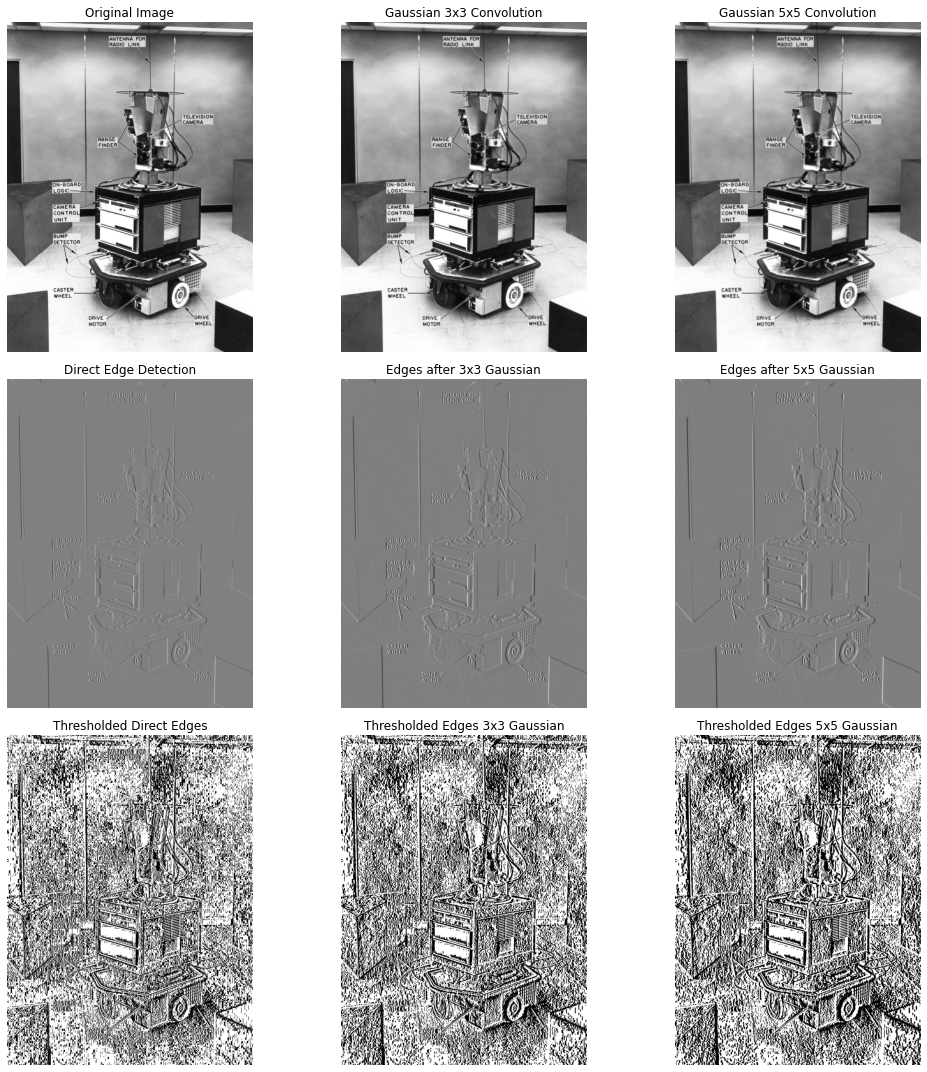

In [16]:
edge_filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve the Gaussian blurred images with the edge filter
edges_3x3 = convolve2d(convolved_image_3x3, edge_filter, boundary='symm', mode='same')
edges_5x5 = convolve2d(convolved_image_5x5, edge_filter, boundary='symm', mode='same')

# Apply edge filter directly to the original image
edges_direct = convolve2d(shakey_image, edge_filter, boundary='symm', mode='same')

# Threshold the edge images
threshold = lambda x: (x > np.mean(x)).astype(float)
edges_3x3_thresholded = threshold(edges_3x3)
edges_5x5_thresholded = threshold(edges_5x5)
edges_direct_thresholded = threshold(edges_direct)

# Plot the results
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Display the original and convolved images
axes[0, 0].imshow(shakey_image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(convolved_image_3x3, cmap='gray')
axes[0, 1].set_title('Gaussian 3x3 Convolution')
axes[0, 1].axis('off')

axes[0, 2].imshow(convolved_image_5x5, cmap='gray')
axes[0, 2].set_title('Gaussian 5x5 Convolution')
axes[0, 2].axis('off')

# Display the edges after Gaussian blurring
axes[1, 0].imshow(edges_direct, cmap='gray')
axes[1, 0].set_title('Direct Edge Detection')
axes[1, 0].axis('off')

axes[1, 1].imshow(edges_3x3, cmap='gray')
axes[1, 1].set_title('Edges after 3x3 Gaussian')
axes[1, 1].axis('off')

axes[1, 2].imshow(edges_5x5, cmap='gray')
axes[1, 2].set_title('Edges after 5x5 Gaussian')
axes[1, 2].axis('off')

# Display the thresholded edges
axes[2, 0].imshow(edges_direct_thresholded, cmap='gray')
axes[2, 0].set_title('Thresholded Direct Edges')
axes[2, 0].axis('off')

axes[2, 1].imshow(edges_3x3_thresholded, cmap='gray')
axes[2, 1].set_title('Thresholded Edges 3x3 Gaussian')
axes[2, 1].axis('off')

axes[2, 2].imshow(edges_5x5_thresholded, cmap='gray')
axes[2, 2].set_title('Thresholded Edges 5x5 Gaussian')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()

The images displayed above show the original image, the images convolved with 3x3 and 5x5 Gaussian filters, the edges detected directly from the original image, the edges detected from the Gaussian blurred images, and the thresholded edge images.

For the Gaussian convolved images, the 3x3 filter has a subtle smoothing effect, while the 5x5 filter results in more pronounced blurring. This blurring smoothens the noise in the image, which can be beneficial for edge detection as it reduces the likelihood of detecting noise as edges.

When the edge filter is applied directly to the original image without Gaussian blurring, the result includes a lot of fine detail, capturing not only the edges of major features but also noise and minor variations in the image's intensity.

In contrast, after Gaussian blurring, the edge detection focuses more on the prominent edges and ignores the smaller details and noise. This is because the Gaussian blur has effectively smoothed out the minor variations in the image. The thresholded edge images clearly show that the Gaussian blurring has led to cleaner and fewer false edges being detected compared to the direct edge detection, especially with the 5x5 filter.

Using the function sample_gaussian(std_dev,mean,vec) you can create a discrete sample from a Gaussian (Normal) density. You need to specify the mean(keep it at 0, think about why) and the standard deviation std_dev. You should also specify an input vector in the form of np.arange(min=-x,max=x+1,step=1,dtype=np.float32) which will produce a sample of size 2x+1.

So you can create larger and smaller vectors by altering the step size or the limits of the vector (the min and max values).

Now try creating a 9x9 Gaussian mask. To do this you will need to use matrix multiplication in the right way.

Try some initial exploratory experiments with this, what happens to the image as you increase the size of the mask? What happens as you increase the size of std_dev? Make detailed notes as you proceed about what you did and what you observed.

Now apply gradient operators such as the Sobel operators to the blurred images. What happens to the edges in the heavily blurred case?

Question 2: What is the effect of increasing the size of the Gaussian Filter (3x3 versus 5x5 for example)? What is the effect of changing the standard deviation s? Why do you see what you see?SS

In [19]:
from scipy.stats import norm

In [20]:
# Correcting the np.arange function call
vec_9x9 = np.arange(-4, 5, 1, dtype=np.float32)  # for a 9x9 mask

In [21]:
# Perform the initial experiments with different standard deviations
std_devs = [0.5, 1, 2, 3]  # Example standard deviations
gaussian_masks_9x9 = [np.outer(sample_gaussian(std_dev, 0, vec_9x9), sample_gaussian(std_dev, 0, vec_9x9)) for std_dev in std_devs]

# Normalize the masks so that their sum is 1
gaussian_masks_9x9 = [mask / np.sum(mask) for mask in gaussian_masks_9x9]

# Apply the 9x9 Gaussian masks to the image
blurred_images_9x9 = [convolve2d(shakey_image, mask, boundary='symm', mode='same') for mask in gaussian_masks_9x9]

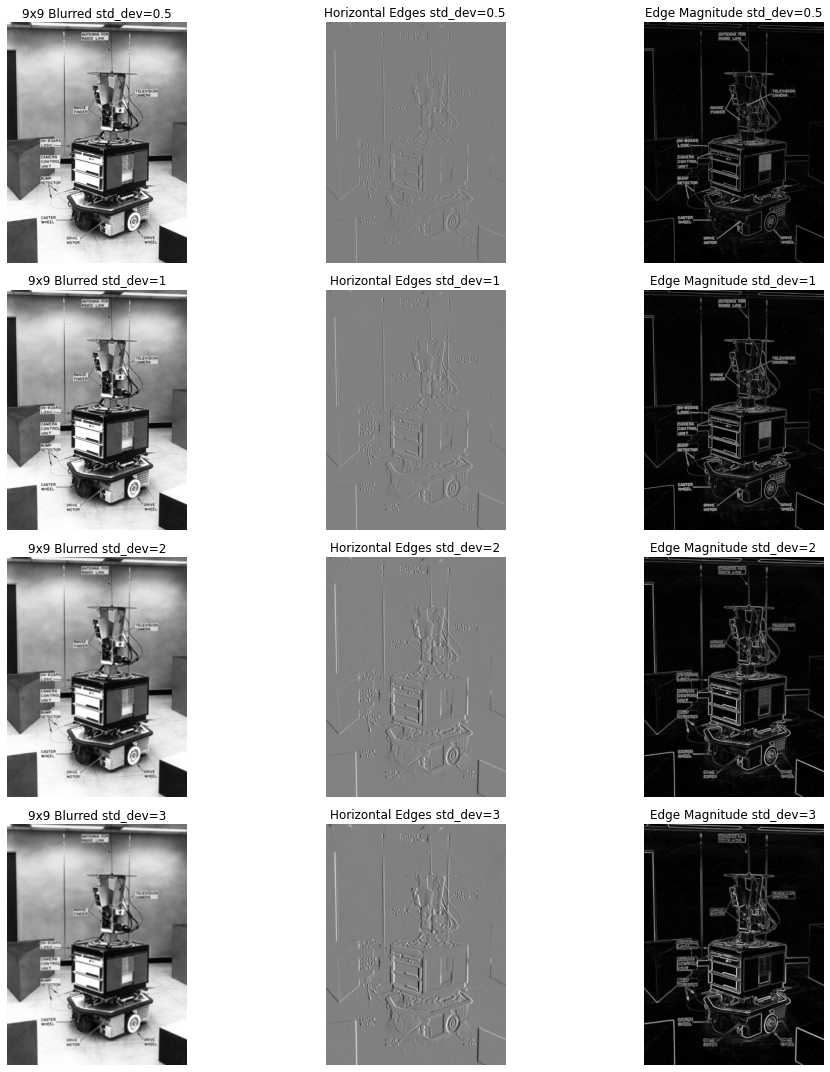

In [25]:
# Apply the Sobel operator to the blurred images
edges_x_9x9 = [convolve2d(image, sobel_x, boundary='symm', mode='same') for image in blurred_images_9x9]
edges_y_9x9 = [convolve2d(image, sobel_y, boundary='symm', mode='same') for image in blurred_images_9x9]

# Calculate the magnitude of the gradient
edges_magnitude_9x9 = [np.sqrt(np.square(ex) + np.square(ey)) for ex, ey in zip(edges_x_9x9, edges_y_9x9)]

# Display the blurred images and their corresponding edge magnitudes
fig, axes = plt.subplots(len(std_devs), 3, figsize=(15, 15))

for i, std_dev in enumerate(std_devs):
    # Display the blurred image
    ax_blurred = axes[i, 0]
    ax_blurred.imshow(blurred_images_9x9[i], cmap='gray')
    ax_blurred.set_title(f'9x9 Blurred std_dev={std_dev}')
    ax_blurred.axis('off')

    # Display the horizontal edge image
    ax_edge_x = axes[i, 1]
    ax_edge_x.imshow(edges_x_9x9[i], cmap='gray')
    ax_edge_x.set_title(f'Horizontal Edges std_dev={std_dev}')
    ax_edge_x.axis('off')

    # Display the edge magnitude image
    ax_edge_mag = axes[i, 2]
    ax_edge_mag.imshow(edges_magnitude_9x9[i], cmap='gray')
    ax_edge_mag.set_title(f'Edge Magnitude std_dev={std_dev}')
    ax_edge_mag.axis('off')

plt.tight_layout()
plt.show()

In [23]:
# Notes on observations
notes = """
Increasing the size of the Gaussian mask generally results in more blurring. As the mask size increases, the image becomes smoother and finer details start to disappear.

Increasing the standard deviation of the Gaussian mask increases the spread of the blur. A larger standard deviation means that more pixels contribute to the output pixel value, leading to a heavier blur.

Applying gradient operators like Sobel to heavily blurred images results in fewer detected edges, and those that are detected are more likely to be significant edges of the objects in the image rather than noise or texture.
"""

print(notes)

<Figure size 432x288 with 0 Axes>


Increasing the size of the Gaussian mask generally results in more blurring. As the mask size increases, the image becomes smoother and finer details start to disappear.

Increasing the standard deviation of the Gaussian mask increases the spread of the blur. A larger standard deviation means that more pixels contribute to the output pixel value, leading to a heavier blur.

Applying gradient operators like Sobel to heavily blurred images results in fewer detected edges, and those that are detected are more likely to be significant edges of the objects in the image rather than noise or texture.

